# <font color='darkblue'>Reading, Understanding and Preparaing Data</font>

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the files companies and rounds2 as dataframes

companies = pd.read_csv("companies.csv",encoding="ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv",encoding="ISO-8859-1")

In [3]:
#Understanding the shape of the data

print(companies.shape)
print(rounds2.shape)

(66368, 10)
(114949, 6)


## <font color='darkviolet'>1. Further glimpse of data by head() and info()</font>

In [4]:
companies.head()

permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        Curated Web  operating          CHN   
4                                           Software  operating          USA   

  state_code                 region           city  founded_at  
0         16                 Mumbai         Mumbai         NaN  
1         DE             DE - Other  Delaware City  04-09-2014  
2        NaN                    NaN            NaN         NaN  
3         22                Beijing        Beijing  01-01-2007  
4         IL  Springfield, Illinois      Champaign  01-01-2010

In [5]:
rounds2.head()

company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008          2000000.0

In [6]:
print(companies.info())
print("\n")
print(rounds2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  objec

### <font color='green'>Observations :</font>

* `There are 10 columns in companies and 6 in rounds2.`
* `Total Records in companies is **66368** and that of in rounds2 is `**`114949`**`.`
* `There are `**`NaN`**` values in both the dataframes.`
* **`permalink`**` in companies has got `**`0 NaN`**` values which can be potentially the unique column`


## <font color='darkviolet'>2. Finding the unique column in companies</font>

In [7]:
#finding if there are any duplicate values in companies.permalink

companies.permalink.value_counts()

/Organization/Mangrkart             1
/Organization/Villagemd             1
/Organization/Samesurf              1
/Organization/Livrada               1
/Organization/Middlegate            1
                                   ..
/Organization/Sunnova               1
/Organization/Guokr                 1
/Organization/Trenstar              1
/Organization/Avast                 1
/Organization/Kapow-Technologies    1
Name: permalink, Length: 66368, dtype: int64

In [8]:
#finding if there are any duplicate values in rounds2.company_permalink

rounds2.company_permalink.value_counts()

/ORGANIZATION/SOLARFLARE                              10
/organization/solarflare                               9
/ORGANIZATION/ENDOGASTRIC-SOLUTIONS                    9
/ORGANIZATION/QUELLAN                                  9
/organization/exagen-diagnostics                       9
                                                      ..
/ORGANIZATION/BEISEN                                   1
/organization/beth-israel-deaconess-medical-center     1
/ORGANIZATION/BUNCH                                    1
/organization/cardinal-health                          1
/organization/postx                                    1
Name: company_permalink, Length: 90247, dtype: int64

**To ensure we do not treat 2 companies as different due to case mistmatch**

In [9]:
#converting the values of companies.permalink and rounds2.company_permalink to lowercase

rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())

companies.permalink= companies.permalink.apply(lambda x: x.lower())

In [10]:
#checking for unique values again for companies.permalink
companies.permalink.value_counts()

/organization/onix-microsystems    1
/organization/graduway             1
/organization/mineraltree          1
/organization/geniac               1
/organization/coraid               1
                                  ..
/organization/diwanee              1
/organization/palate-home          1
/organization/the-assets           1
/organization/yr-mrkt              1
/organization/blue-freedom         1
Name: permalink, Length: 66368, dtype: int64

In [11]:
#checking for unique values again for rounds2.company_permalink
rounds2.company_permalink.value_counts()

/organization/solarflare               19
/organization/exagen-diagnostics       18
/organization/quellan                  18
/organization/semprius                 18
/organization/endogastric-solutions    17
                                       ..
/organization/lyla-beauty               1
/organization/shoptizen                 1
/organization/trailhead-lodge           1
/organization/incubus                   1
/organization/helicos-biosciences       1
Name: company_permalink, Length: 66370, dtype: int64

### <font color='green'>Observations :</font>

* `All the values in `**`companies.permalink`**` are unique before and after converting the case. Hence we can use it as a `**`UNIQUE COLUMN`**` in companies.`

* `The number of unique companies in rounds2 changed from `**`90247 to 66370`**` after converting the case which is an evidence that there were entries with uneven types.`

* `It seems like there are 2 more companies present in rounds2 ( NOT CONCLUSIVE AS OF NOW )`


## <font color='darkviolet'>3. Analysing companies in both datasets using 'sets'</font>

In [12]:
#all unique companies in rounds2
x=set(rounds2.company_permalink)

In [13]:
#all unique companies in companies
y=set(companies.permalink)

In [14]:
#number of unique companies in rounds2 and companies respectively
print("unique companies in rounds2 : %d"%len(x))
print("unique companies in companies : %d"%len(y))

unique companies in rounds2 : 66370
unique companies in companies : 66368


In [15]:
#finding total number of unique companies
len(x.union(y))

66375

In [16]:
#finding the common companies in both datasets
len(x.intersection(y))

66363

In [17]:
#companies present in rounds2 but not in companies
len(x.difference(y))

7

In [18]:
#companies present in companies but not in rounds2
len(y.difference(x))

5

### <font color='green'>Observations :</font>

* `Unique companies in `**`companies`**` = 66368`
* `Unique companies in `**`rounds2`**` = 66370`
* `Total number of unique companies in both data sets together = 66375`
* `companies present in `**`rounds2`**` but not in `**`companies`**` = 7`
* `companies presnet in `**`companies`**` but not in `**`rounds2`**` = 5`


## <font color='darkviolet'>4. Merging both the datasets to create a 'master_frame'</font>

***`Since the common column in both the datasets is the permalink, we need to ensure that the column name is same in both.`***

In [19]:
#alterning the column name rounds2.company_permalink to rounds2.permalink
rounds2 = rounds2.rename(columns={"company_permalink": "permalink"})

*`Merging rounds2 and companies into master_frame by using an `**`INNER JOIN`**` since there are just 12 companies which do not exist in both, but just exist in either and hence can be ignored. Any other join (left,right,outer) will introduce missing values. Also having company data without its funding details or vice-versa wont help us in deducing any insights.`*

In [20]:
#merging companies and rounds2 by inner join
master_frame = pd.merge(rounds2,companies,how="inner",on="permalink")

In [21]:
#shape of the master_frame 
master_frame.shape

(114942, 15)

In [22]:
master_frame.head()

permalink  \
0                  /organization/-fame   
1               /organization/-qounter   
2               /organization/-qounter   
3  /organization/-the-one-of-them-inc-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd                    name  \
0                  B  05-01-2015         10000000.0                   #fame   
1                  A  14-10-2014                NaN                :Qounter   
2                NaN  01-03-2014           700000.0                :Qounter   
3                  B  30-01-2014          3406878.0  (THE) ONE of THEM,Inc.   
4                  A  19-03-2008          2000000.0                 0-6.com   

             homepage_url                                      category_list  \
0      http://livfame.com                                              Media   
1  http://www.qounter.com  Application Platforms|Real Time|Social Network...   
2  http://www.qounter.com  Application Platforms|Real Time|Social Network...   
3     http://oneofthem.jp                                  Apps|Games|Mobile   
4      http://www.0-6.com                                        Curated Web   

      status country_code state_code      region           city  founded_at  
0  operating          IND         16      Mumbai         Mumbai         NaN  
1  operating          USA         DE  DE - Other  Delaware City  04-09-2014  
2  operating          USA         DE  DE - Other  Delaware City  04-09-2014  
3  operating          NaN        NaN         NaN            NaN         NaN  
4  operating          CHN         22     Beijing        Beijing  01-01-2007

In [23]:
master_frame.shape

(114942, 15)

In [24]:
#chekcing if our primary attribute in the master_frame hasn't got any missing values
master_frame.permalink.isnull().sum()

0

### <font color='green'>Observations :</font>

`* The master_frame has `**`114942 rows and 15 columns`**` ( 10+6-1 as we have one common column : permalik)`
`* There are no null values in master_frame.permalink`

# <font color='darkblue'>Data Cleaning</font>

**This phase involves removing uncessary columns, finding and treating missing values, removing outliers if any.**

## <font color='darkviolet'>1. Finding missing values and Treating them</font>


In [25]:
#assigning this to a temp variable on which all the data cleaning steps would be performed
temp = master_frame

In [26]:
#Finding if there are any missing values in each column
temp.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [27]:
#finding percentages of missing values in each column
round(100*temp.isnull().sum()/len(temp.index),2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

### <font color='green'>Observations :</font>
* `Since `**`funding_round_code`**` has `**`72%`**` missing values and we have `**`funding_round_type`**` which can be used to differentiate the funding type we can get rid of this column by dropping it.`

* `Since `**`founded_at`**` is the company establishment date and has no much dependency on our findings we can drop it too`

In [28]:
#dropping funding_round_code and founded_at from temp
temp=temp.drop("funding_round_code",axis=1)
temp=temp.drop("founded_at",axis=1)

In [29]:
#printing shape to verify if the columns got dropped 
temp.shape

(114942, 13)

In [30]:
#finding the percentage of missing values in each column again
round(100*temp.isnull().sum()/len(temp.index),2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

### <font color='green'>Observations :</font>

`We can now see that the columns have been removed`

* `The next highest percentage of missing values lies in `**`state_code`**` followed by region,city and countre_code.`
* `Since city lies within a region which lies within a state which lies within a country, we can fill in the country code if we have city, region and state values for any record.`

`Let us see if we have any such records where country is missing but we have the other 3 values.`

In [31]:
#creating a subset of data which contains records where the country is missing
country_missing = temp[temp.country_code.isna()]
country_missing

permalink  \
3                     /organization/-the-one-of-them-inc-   
32                                  /organization/1000chi   
66                                    /organization/10k-2   
71                               /organization/10tracks-2   
72                               /organization/10tracks-2   
...                                                   ...   
114829                              /organization/zuumtel   
114842      /organization/zwayo-"on-demand-valet-parking"   
114853                                /organization/zyfin   
114939                               /organization/ãeron   
114941  /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...   

                                funding_round_permalink funding_round_type  \
3       /funding-round/650b8f704416801069bb178a1418776b            venture   
32      /funding-round/854fae13c5b26b2ea6b32b06c2e5890c              angel   
66      /funding-round/95401c8e8336892bf375ad94efd6c725               seed   
71      /funding-round/74606b480fe509973a3d72c9017876ca            venture   
72      /funding-round/e31e2474786f930fd72e292ec34e9126               seed   
...                                                 ...                ...   
114829  /funding-round/d5d97d7c8a5e923715b15495d44e7cb8               seed   
114842  /funding-round/eb5163bb6feea4384121e27699bb7b25               seed   
114853  /funding-round/98cef3afd5e88487a9829ff182fb1a25            venture   
114939  /funding-round/59f4dce44723b794f21ded3daed6e4fe            venture   
114941  /funding-round/af942869878d2cd788ef5189b435ebc4              grant   

         funded_at  raised_amount_usd  \
3       30-01-2014          3406878.0   
32      01-04-2010         43923865.0   
66      04-09-2015           100000.0   
71      03-02-2014                NaN   
72      31-07-2013                NaN   
...            ...                ...   
114829  01-04-2013           100000.0   
114842  01-09-2014            60000.0   
114853  01-11-2011                NaN   
114939  01-08-2014                NaN   
114941  01-10-2013            14851.0   

                                                 name  \
3                              (THE) ONE of THEM,Inc.   
32                Beijing 1000CHI Software Technology   
66                                       Beans Around   
71                                           10tracks   
72                                           10tracks   
...                                               ...   
114829                                        ZUUMTEL   
114842                Zwayo "On-Demand Valet Parking"   
114853                                          Zyfin   
114939                                         ÃERON   
114941  Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic   

                   homepage_url                         category_list  \
3           http://oneofthem.jp                     Apps|Games|Mobile   
32      http://www.1000chi.com/                                Mobile   
66      http://beansaround.com/  Coffee|Delivery|Subscription Service   
71          http://10tracks.com                      iOS|Mobile|Music   
72          http://10tracks.com                      iOS|Mobile|Music   
...                         ...                                   ...   
114829   http://www.zuumtel.com           Automotive|Design|Real Time   
114842      http://www.zwayo.co                     Apps|Cars|Parking   
114853    http://www.zyfin.com/                               Finance   
114939     http://www.aeron.hu/                                   NaN   
114941     http://inovatiff.com    Consumer Goods|E-Commerce|Internet   

           status country_code state_code region city  
3       operating          NaN        NaN    NaN  NaN  
32      operating          NaN        NaN    NaN  NaN  
66      operating          NaN        NaN    NaN  NaN  
71      operating          NaN        NaN    NaN  NaN  
72      operating          NaN        NaN  

In [32]:
#finding how many records where the country is missing also has state, region and city missing
country_missing[country_missing.state_code.isna() & country_missing.region.isna() & country_missing.city.isna()] 

permalink  \
3                     /organization/-the-one-of-them-inc-   
32                                  /organization/1000chi   
66                                    /organization/10k-2   
71                               /organization/10tracks-2   
72                               /organization/10tracks-2   
...                                                   ...   
114829                              /organization/zuumtel   
114842      /organization/zwayo-"on-demand-valet-parking"   
114853                                /organization/zyfin   
114939                               /organization/ãeron   
114941  /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...   

                                funding_round_permalink funding_round_type  \
3       /funding-round/650b8f704416801069bb178a1418776b            venture   
32      /funding-round/854fae13c5b26b2ea6b32b06c2e5890c              angel   
66      /funding-round/95401c8e8336892bf375ad94efd6c725               seed   
71      /funding-round/74606b480fe509973a3d72c9017876ca            venture   
72      /funding-round/e31e2474786f930fd72e292ec34e9126               seed   
...                                                 ...                ...   
114829  /funding-round/d5d97d7c8a5e923715b15495d44e7cb8               seed   
114842  /funding-round/eb5163bb6feea4384121e27699bb7b25               seed   
114853  /funding-round/98cef3afd5e88487a9829ff182fb1a25            venture   
114939  /funding-round/59f4dce44723b794f21ded3daed6e4fe            venture   
114941  /funding-round/af942869878d2cd788ef5189b435ebc4              grant   

         funded_at  raised_amount_usd  \
3       30-01-2014          3406878.0   
32      01-04-2010         43923865.0   
66      04-09-2015           100000.0   
71      03-02-2014                NaN   
72      31-07-2013                NaN   
...            ...                ...   
114829  01-04-2013           100000.0   
114842  01-09-2014            60000.0   
114853  01-11-2011                NaN   
114939  01-08-2014                NaN   
114941  01-10-2013            14851.0   

                                                 name  \
3                              (THE) ONE of THEM,Inc.   
32                Beijing 1000CHI Software Technology   
66                                       Beans Around   
71                                           10tracks   
72                                           10tracks   
...                                               ...   
114829                                        ZUUMTEL   
114842                Zwayo "On-Demand Valet Parking"   
114853                                          Zyfin   
114939                                         ÃERON   
114941  Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic   

                   homepage_url                         category_list  \
3           http://oneofthem.jp                     Apps|Games|Mobile   
32      http://www.1000chi.com/                                Mobile   
66      http://beansaround.com/  Coffee|Delivery|Subscription Service   
71          http://10tracks.com                      iOS|Mobile|Music   
72          http://10tracks.com                      iOS|Mobile|Music   
...                         ...                                   ...   
114829   http://www.zuumtel.com           Automotive|Design|Real Time   
114842      http://www.zwayo.co                     Apps|Cars|Parking   
114853    http://www.zyfin.com/                               Finance   
114939     http://www.aeron.hu/                                   NaN   
114941     http://inovatiff.com    Consumer Goods|E-Commerce|Internet   

           status country_code state_code region city  
3       operating          NaN        NaN    NaN  NaN  
32      operating          NaN        NaN    NaN  NaN  
66      operating          NaN        NaN    NaN  NaN  
71      operating          NaN        NaN    NaN  NaN  
72      operating          NaN        NaN  

### <font color='green'>Observations :</font>

* `We could see that all the records where the country is missing also have the state, region and city details missing as the number of rows for the above 2 subsets is same and hence we cannot impute country_code.`

* `We cannot drop country_code column as it is required for Spark Funds to understand which countries to invest.`

* `The right thing to do here is to remove the rows where country_code is missing which is `**`7.5%`**` of records`


In [33]:
#creating a subset where the country_code is NOT missing and assgning it back to temp to get rid of records with missing country_code
temp = temp[~(temp.country_code.isna())]

In [34]:
#finding the percentage of missing values in each column again after removing the records with missing country_code
round(100*temp.isnull().sum()/len(temp.index),2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          16.15
name                        0.00
homepage_url                4.28
category_list               1.64
status                      0.00
country_code                0.00
state_code                  2.13
region                      1.40
city                        1.40
dtype: float64

### <font color='green'>Observations :</font>

* `We now got rid of all the records where the country_code is missing. But we still do have around 2% records which have the state, region and/or city missing.`
* `We can choose to clean these values by`
    `1. Remove the rows where this data is missing`
    `2. Remove these columns`

  `Since the Spark Funds only needs analysis based on Country and is not much specific about which state, region or city, ther right approach would be to remove drop these columns.`


In [35]:
#dropping state, region and city columns
temp=temp.drop("state_code",axis=1)
temp=temp.drop("region",axis=1)
temp=temp.drop("city",axis=1)

In [36]:
#finding the percentage of missing values in each column
round(100*temp.isnull().sum()/len(temp.index),2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          16.15
name                        0.00
homepage_url                4.28
category_list               1.64
status                      0.00
country_code                0.00
dtype: float64

### <font color='green'>Obesrvations<font>

* `We now have `**`homepage_url`**` and `**`category_list`**` columns with 4.28% and 1.64% of missing data respectively`
* `We can get rid of the homepage_url column as this is not very significant for our analysis`
* `Whereas the category_list is something which we depend on a lot to find out which categories are most suitable for our investment.`

  `Hence `**`dropping homepage_url`**` and reomving the records with empty category_list would be the right approach to do.`

In [37]:
#dropping homepage_url column

temp=temp.drop("homepage_url",axis=1)

In [38]:
#deleting the rows where the category_list is empty

temp = temp[~(temp.category_list.isna())]

In [39]:
#finding the percentage of missing values in each column
round(100*temp.isnull().sum()/len(temp.index),2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          15.31
name                        0.00
category_list               0.00
status                      0.00
country_code                0.00
dtype: float64

In [40]:
#printing the shape of the data
temp.shape

(104532, 9)

### <font color='green'>Observations :</font>

* `We have now cleaned all the columns except for `**`raised_amount_usd`**`. This column is also very crucial as Spark Funds wants to invest with some constraints. It wants to invest between `**`5 to 15 million`**` USD.`

* `The only way to treat these missing values is by imputing them with the represntative value of the column. But before that Spark Funds is only interested in the following 4 funding types :`

    `1. Seed`
    
    `2. Angel`
    
    `3. Venture`
    
    `4. Private Equity`
  
 ` Let's see what are the different funding_types in the data we have got.`

In [41]:
#printing all the funding types in the 
temp.funding_round_type.value_counts()

venture                  52024
seed                     26438
debt_financing            6701
angel                     5417
undisclosed               3960
equity_crowdfunding       2970
private_equity            2055
grant                     2001
convertible_note          1633
post_ipo_equity            608
product_crowdfunding       351
post_ipo_debt              151
non_equity_assistance      136
secondary_market            87
Name: funding_round_type, dtype: int64

**There are 14 funding types in total out of which we just need to consider the above mentioned 4.**

In [42]:
#getting rid of other records with a funding_type other than the required 4
temp=temp[temp.funding_round_type.isin(["seed","venture","angel","private_equity"])]

In [43]:
#printing the funding types again
temp.funding_round_type.value_counts()

venture           52024
seed              26438
angel              5417
private_equity     2055
Name: funding_round_type, dtype: int64

In [44]:
#Printing the percentage of missing values in each column
round(100*temp.isnull().sum()/len(temp.index),2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          12.58
name                        0.00
category_list               0.00
status                      0.00
country_code                0.00
dtype: float64

### <font color='green'>Observations :</font>

* `We have now got a subset which contains only the required funding_round_types.`
* `The percentage of missin vlaues for the funding_amount_usd is now 12.58 which needs to be imputed with the representative amount value of each funding_type.`

In [45]:
#describing the subset with funding_type as 'seed' to find the representative value for raised_amount_usd
temp[temp.funding_round_type=="seed"]["raised_amount_usd"].describe()

count    2.109500e+04
mean     7.477937e+05
std      2.288318e+06
min      0.000000e+00
25%      6.881650e+04
50%      3.000000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [46]:
#describing the subset with funding_type as 'venture' to find the representative value for raised_amount_usd
temp[temp.funding_round_type=="venture"]["raised_amount_usd"].describe()

count    4.780900e+04
mean     1.172422e+07
std      8.821571e+07
min      0.000000e+00
25%      1.600000e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [47]:
#describing the subset with funding_type as 'angel' to find the representative value for raised_amount_usd
temp[temp.funding_round_type=="angel"]["raised_amount_usd"].describe()

count    4.400000e+03
mean     9.715739e+05
std      7.710904e+06
min      0.000000e+00
25%      1.527565e+05
50%      4.149060e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

In [48]:
#describing the subset with funding_type as 'private_equity' to find the representative value for raised_amount_usd
temp[temp.funding_round_type=="private_equity"]["raised_amount_usd"].describe()

count    1.820000e+03
mean     7.393849e+07
std      2.017765e+08
min      0.000000e+00
25%      5.000000e+06
50%      2.000000e+07
75%      7.576257e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

### <font color='green'>Observations :</font>

* `We can clearly see that for each of the 4 funding types, the mean and median have very high deviation which might be because of the outliers. The max value for each of the fundting typess is also in a much higher order than that of median.`

* `Hence considering the `**`50th percentile (median) as the reprsenentative value`**` would be the right choice.`

In [49]:
#extracting the median value for raised_amount_usd for each funding_type
group = temp.groupby("funding_round_type")[["raised_amount_usd"]].median()
group

raised_amount_usd
funding_round_type                   
angel                        414906.0
private_equity             20000000.0
seed                         300000.0
venture                     5000000.0

In [50]:
#a function which takes the median values from the above grouped data and imputes the missing cells in the
#raised_amount_usd column with appropriate median value depending on the funding type of that record.
def impute_funding(x):
    group = temp.groupby("funding_round_type")[["raised_amount_usd"]].median()
    temp.loc[((temp.funding_round_type==x) & (temp.raised_amount_usd.isna())),"raised_amount_usd"]=group.loc[x][0]
    

In [51]:
#running the above function for the four different funding types
for i in temp.funding_round_type.value_counts().index:
    impute_funding(i)

In [52]:
#printing the percentage of null values after imputing the raised_amount_usd column
round(100*temp.isnull().sum()/len(temp.index),2)

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [53]:
#Printing the shape of the data after performing missing value treament
temp.shape

(85934, 9)

In [54]:
#Number of rows dropped as a part of the missing value treatment
114942-85934

29008

### <font color='green'>Observations :</font>

* `We now got rid of all the missing values by removing columns, rows and imputing representative values.`
* `As a part of this we removed 6 columns and 29008 rows and now we are left with `**`85934`**` rows.`

  `The next step is to remove outliers in the raised_amount_usd field as the mean is pretty much deviating from the median for each funding_type. We try to remove as less rows as possible and get the mean and median as much close as we can.`

## <font color='darkviolet'>2. Removing Outliers</font>



* The only numeric column that we have is the raised_amoount_usd which, as we could find out while imputing values, has got outliers because of which the mean and meadian show a lot of deviation. Let's try to remove those outliers by removing 4-5% of the data at the higher end.

* Before that let's see how the spread for each funding type looks like by uisng boxplots

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

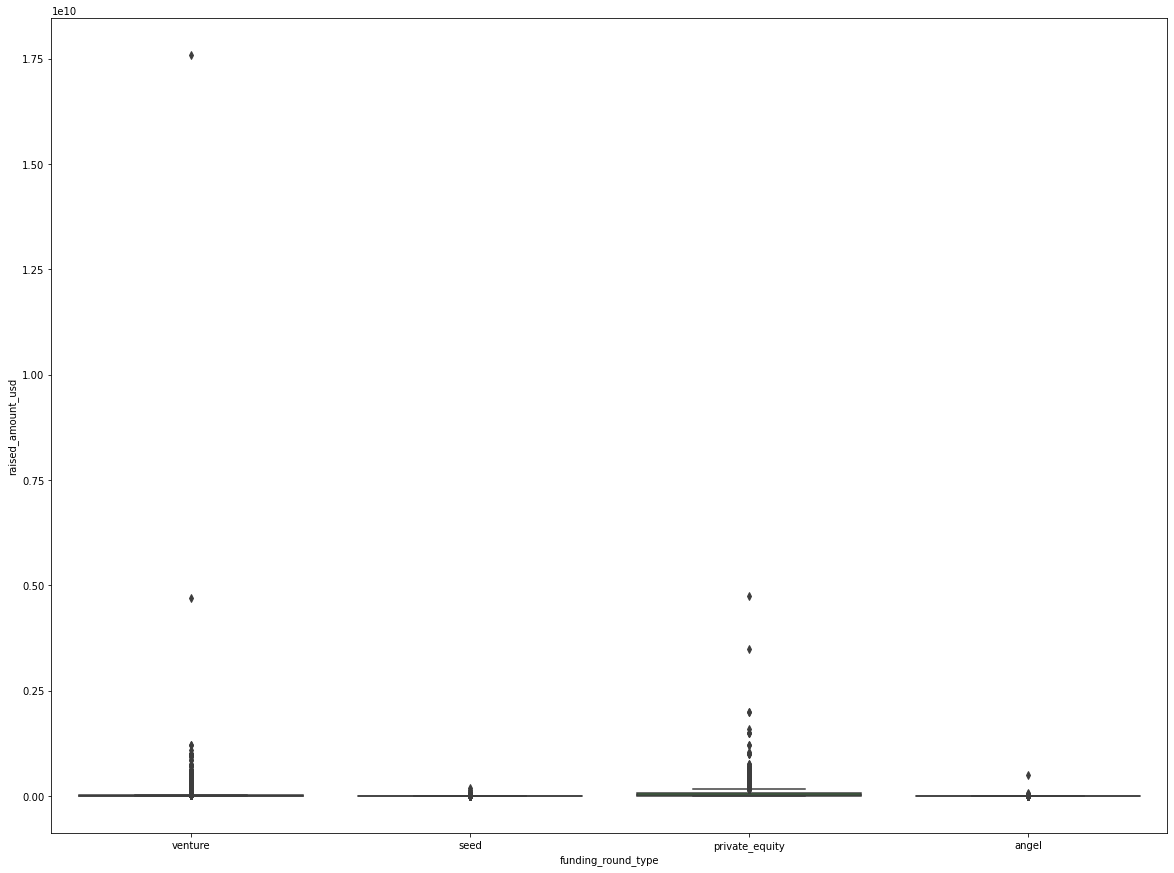

In [55]:
#plotting a box plot using funding_round_type on X-axis and raised_amount_usd on y-axis
plt.figure(figsize=(20,15))
sns.boxplot(x=temp.funding_round_type,y=temp.raised_amount_usd)

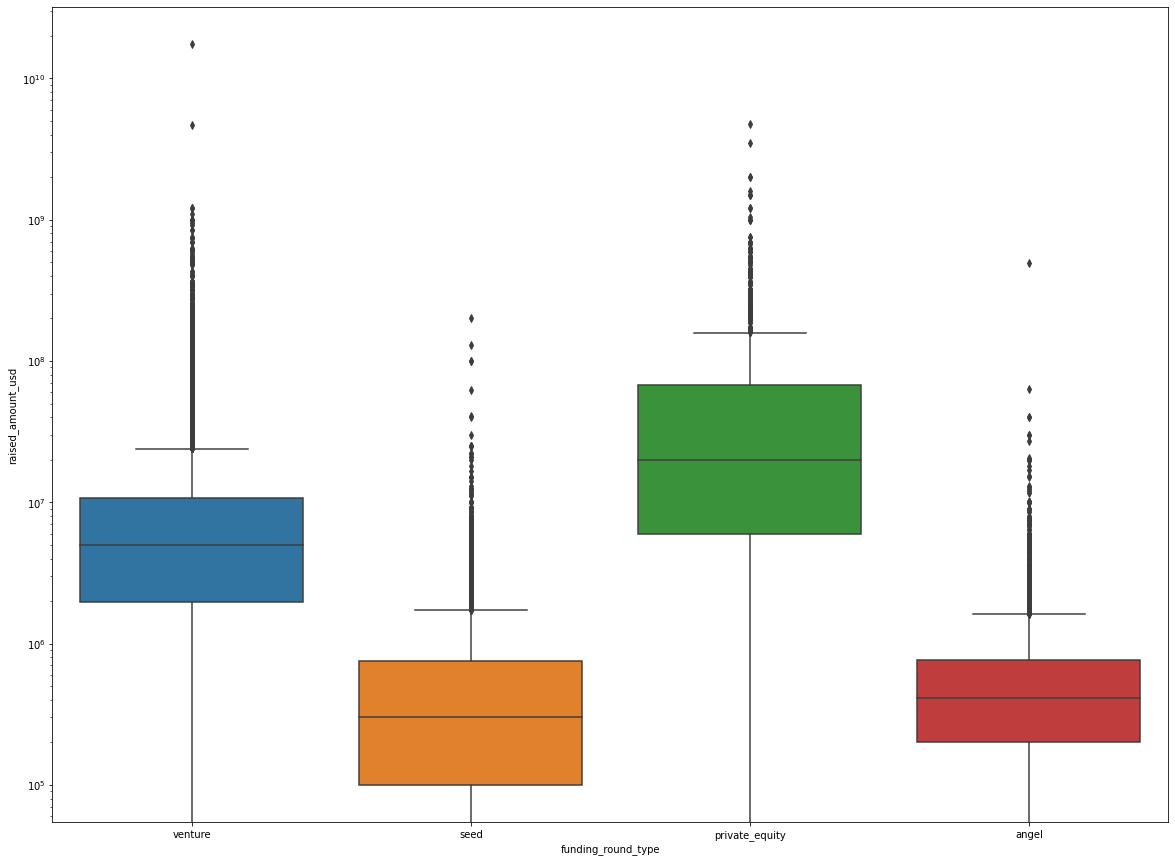

In [56]:
#changing the y-scale to log as exponential scale is difficult to interprete 
plt.figure(figsize=(20,15))
sns.boxplot(x=temp.funding_round_type,y=temp.raised_amount_usd)
plt.yscale("log")
plt.show()

### Obesrvations

* `We could see that the raised_amount_usd for different funding types is quite different as the funding happens during the startup for seed type, during the expansion for angel type, during a more mature stage for venture and when it's well establish for private_equity.`

* `Also within each of the funding_types we could see some data at the max end which is skewing the mean value. Let's remove the top 4-5% of data for each type so that we can reduce the difference between mean and median.`

#### Treating the rows with funding type : SEED

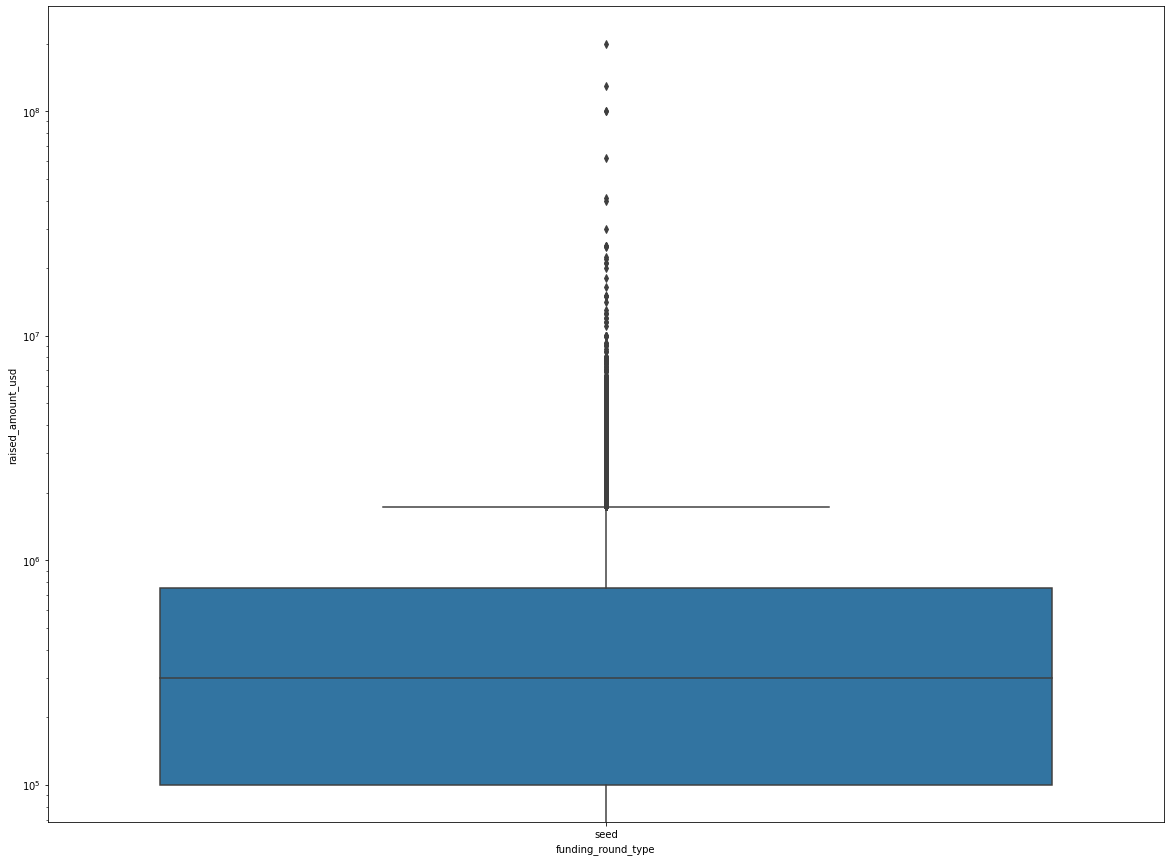

In [57]:
#Plotting the boxplot for funding_round_type 'seed'
plt.figure(figsize=(20,15))
sns.boxplot(x=temp[temp.funding_round_type=="seed"]["funding_round_type"],y=temp.raised_amount_usd)
plt.yscale("log")
plt.show()

In [58]:
#describing the amount for 'seed' type to get the idea of the spread
temp[temp.funding_round_type=="seed"]["raised_amount_usd"].describe()

count    2.643800e+04
mean     6.572966e+05
std      2.051936e+06
min      0.000000e+00
25%      1.000000e+05
50%      3.000000e+05
75%      7.500000e+05
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [59]:
#total number of rows with funding_type 'seed'
temp.loc[(temp.funding_round_type=="seed"),"raised_amount_usd"]

2          700000.0
7           43360.0
9         3000000.0
13         150000.0
15        1000050.0
            ...    
114933     320000.0
114935       7000.0
114936      33149.0
114938      32842.0
114940      18192.0
Name: raised_amount_usd, Length: 26438, dtype: float64

In [60]:
#finding an appropriate value of 'amount' above which the data can be dropped
temp.loc[(temp.funding_round_type=="seed") & (temp.raised_amount_usd>=2500000),"raised_amount_usd"]

9         3000000.0
278       2588852.0
755       5100000.0
787       2700000.0
817       4000000.0
            ...    
114566    3000000.0
114587    4424622.0
114623    2941715.0
114687    3300000.0
114744    3200000.0
Name: raised_amount_usd, Length: 1210, dtype: float64

In [61]:
#finding the percentage of records which can be ignored
1210/26438*100

4.576745593463953

In [62]:
#dropping the records where the type is 'seed' and amount is greater than 2500000
temp=temp.loc[~((temp.funding_round_type=="seed") & (temp.raised_amount_usd>=2500000))]

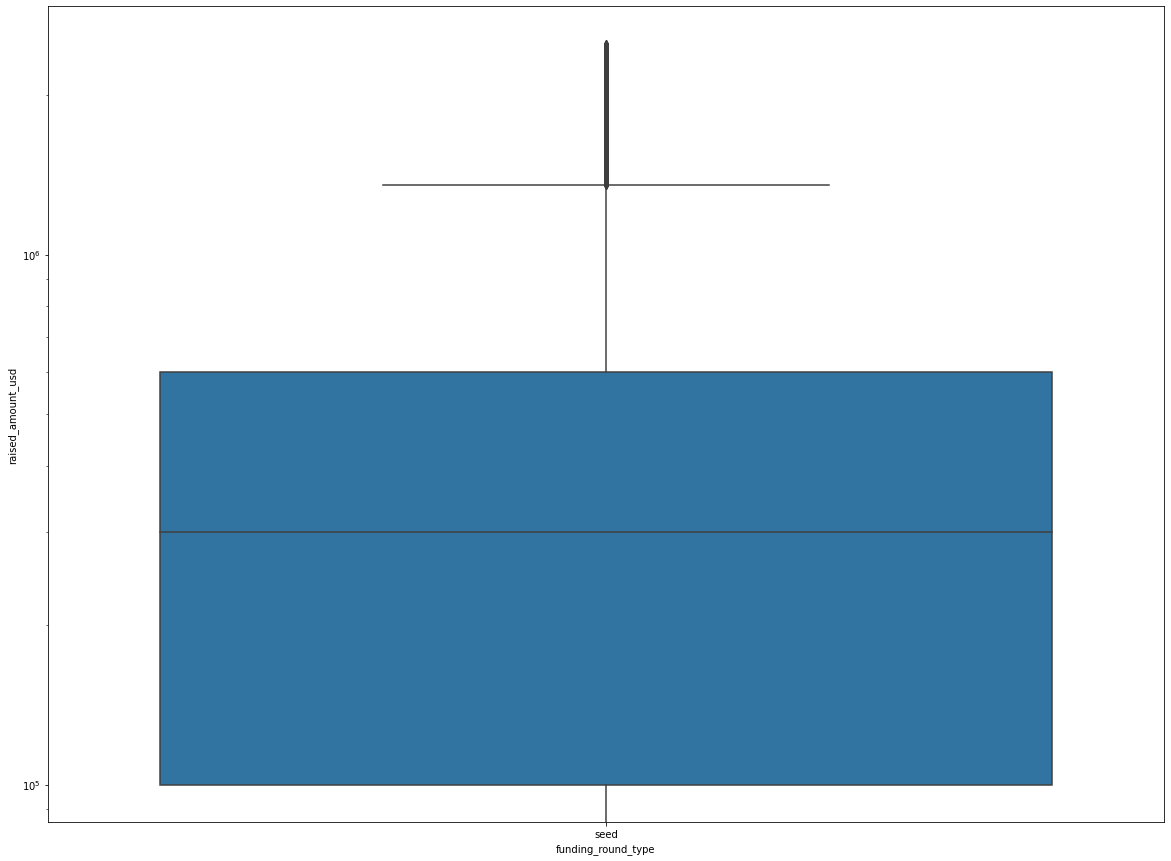

In [63]:
#Plotting the boxplot for funding_round_type 'seed' after dropping 4.5% of the rows at higher end
plt.figure(figsize=(20,15))
sns.boxplot(x=temp[temp.funding_round_type=="seed"]["funding_round_type"],y=temp.raised_amount_usd)
plt.yscale("log")
plt.show()

In [64]:
#describing the raised_amount for type 'seed' after removing the top 4.5% of rows
temp[temp.funding_round_type=="seed"]["raised_amount_usd"].describe()

count    2.522800e+04
mean     4.761695e+05
std      5.315275e+05
min      0.000000e+00
25%      1.000000e+05
50%      3.000000e+05
75%      6.000000e+05
max      2.499999e+06
Name: raised_amount_usd, dtype: float64

### <font color='green'>Observations :</font>

* `The mean and median are now in the same degree i.e., 10^5`

#### Treating the rows with funding type : VENTURE

In [65]:
#Plotting the boxplot for funding_round_type 'venture'
plt.figure(figsize=(20,15))
sns.boxplot(x=temp[temp.funding_round_type=="venture"]["funding_round_type"],y=temp.raised_amount_usd)
plt.yscale("log")
plt.show()

In [66]:
#describing the amount for 'venture' type to get the idea of the spread
temp[temp.funding_round_type=="venture"]["raised_amount_usd"].describe()

count    5.202400e+04
mean     1.117942e+07
std      8.458644e+07
min      0.000000e+00
25%      1.955812e+06
50%      5.000000e+06
75%      1.080638e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [67]:
#total number of rows with funding_type 'venture'
temp.loc[(temp.funding_round_type=="venture"),"raised_amount_usd"]

0         10000000.0
1          5000000.0
4          2000000.0
5          5000000.0
8           719491.0
             ...    
114924     7991547.0
114927      140500.0
114929     8500000.0
114930     2686600.0
114934     1587301.0
Name: raised_amount_usd, Length: 52024, dtype: float64

In [68]:
#finding an appropriate value of 'amount' above which the data can be dropped
temp.loc[(temp.funding_round_type=="venture") & (temp.raised_amount_usd>=80000000),"raised_amount_usd"]

139        82372322.0
144       100000000.0
228       116000000.0
236       296000000.0
253       115000000.0
             ...     
114719     85000000.0
114762     85000000.0
114798    115000000.0
114904    490000000.0
114905    300000000.0
Name: raised_amount_usd, Length: 639, dtype: float64

In [69]:
#finding the percentage of records which can be ignored
693/52024*100

1.3320775026910656

In [70]:
#dropping the records where the type is 'venture' and amount is greater than 40000000
temp=temp.loc[~((temp.funding_round_type=="venture") & (temp.raised_amount_usd>=80000000))]

In [71]:
#Plotting the boxplot for funding_round_type 'venture' after dropping 1.3% of the rows at higher end
plt.figure(figsize=(20,15))
sns.boxplot(x=temp[temp.funding_round_type=="venture"]["funding_round_type"],y=temp.raised_amount_usd)
plt.yscale("log")
plt.show()

In [72]:
#describing the raised_amount for type 'venture' after removing the top 1.3% of rows
temp[temp.funding_round_type=="venture"]["raised_amount_usd"].describe()

count    5.138500e+04
mean     8.694398e+06
std      1.115405e+07
min      0.000000e+00
25%      1.890000e+06
50%      5.000000e+06
75%      1.006515e+07
max      8.000000e+07
Name: raised_amount_usd, dtype: float64

### <font color='green'>Observations :</font>

* `The mean and median are now in the same degree i.e., 10^6`

#### Treating the rows with funding type : ANGEL

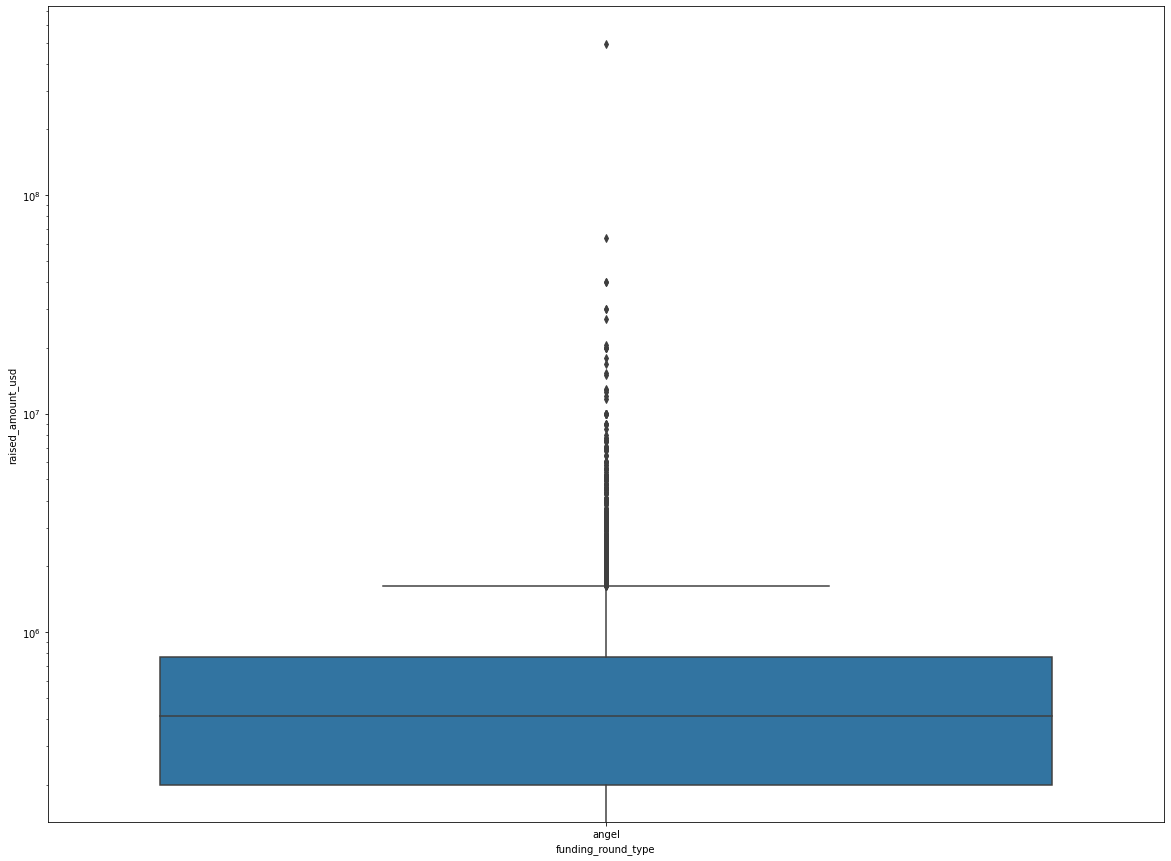

In [73]:
#Plotting the boxplot for funding_round_type 'angel'
plt.figure(figsize=(20,15))
sns.boxplot(x=temp[temp.funding_round_type=="angel"]["funding_round_type"],y=temp.raised_amount_usd)
plt.yscale("log")
plt.show()

In [74]:
#describing the amount for 'angel' type to get the idea of the spread
temp[temp.funding_round_type=="angel"]["raised_amount_usd"].describe()

count    5.417000e+03
mean     8.670638e+05
std      6.952730e+06
min      0.000000e+00
25%      2.000000e+05
50%      4.149060e+05
75%      7.700000e+05
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

In [75]:
#total number of rows with funding_type 'angel'
temp.loc[(temp.funding_round_type=="angel"),"raised_amount_usd"]

51         414906.0
69         100000.0
93         500000.0
98         414906.0
106        619494.0
            ...    
114906     414906.0
114912    2325000.0
114922    2007363.0
114928     875000.0
114932     400000.0
Name: raised_amount_usd, Length: 5417, dtype: float64

In [76]:
#finding an appropriate value of 'amount' above which the data can be dropped
temp.loc[(temp.funding_round_type=="angel") & (temp.raised_amount_usd>=2700000),"raised_amount_usd"]

709        2928257.0
948       30000000.0
953        4502251.0
955       63590263.0
986        7575757.0
             ...    
112664     4792332.0
113142     3000000.0
113707     4000000.0
113763    13000000.0
114825     2700000.0
Name: raised_amount_usd, Length: 232, dtype: float64

In [77]:
#finding the percentage of records which can be ignored
100*232/5417

4.282813365331364

In [78]:
#dropping the records where the type is 'angel' and amount is greater than 2700000
temp=temp.loc[~((temp.funding_round_type=="angel") & (temp.raised_amount_usd>=2700000))]

In [79]:
#Plotting the boxplot for funding_round_type 'angel' after dropping 4.2% of the rows at higher end
plt.figure(figsize=(20,15))
sns.boxplot(x=temp[temp.funding_round_type=="angel"]["funding_round_type"],y=temp.raised_amount_usd)
plt.yscale("log")
plt.show()

In [80]:
#describing the raised_amount for type 'angel' after removing the top 4.2% of rows
temp[temp.funding_round_type=="angel"]["raised_amount_usd"].describe()

count    5.185000e+03
mean     5.426721e+05
std      5.099104e+05
min      0.000000e+00
25%      2.000000e+05
50%      4.149060e+05
75%      6.948950e+05
max      2.665662e+06
Name: raised_amount_usd, dtype: float64

### <font color='green'>Observations :</font>

* `The mean and median are now much closer`

#### Treating the rows with funding type : PRIVATE EQUITY

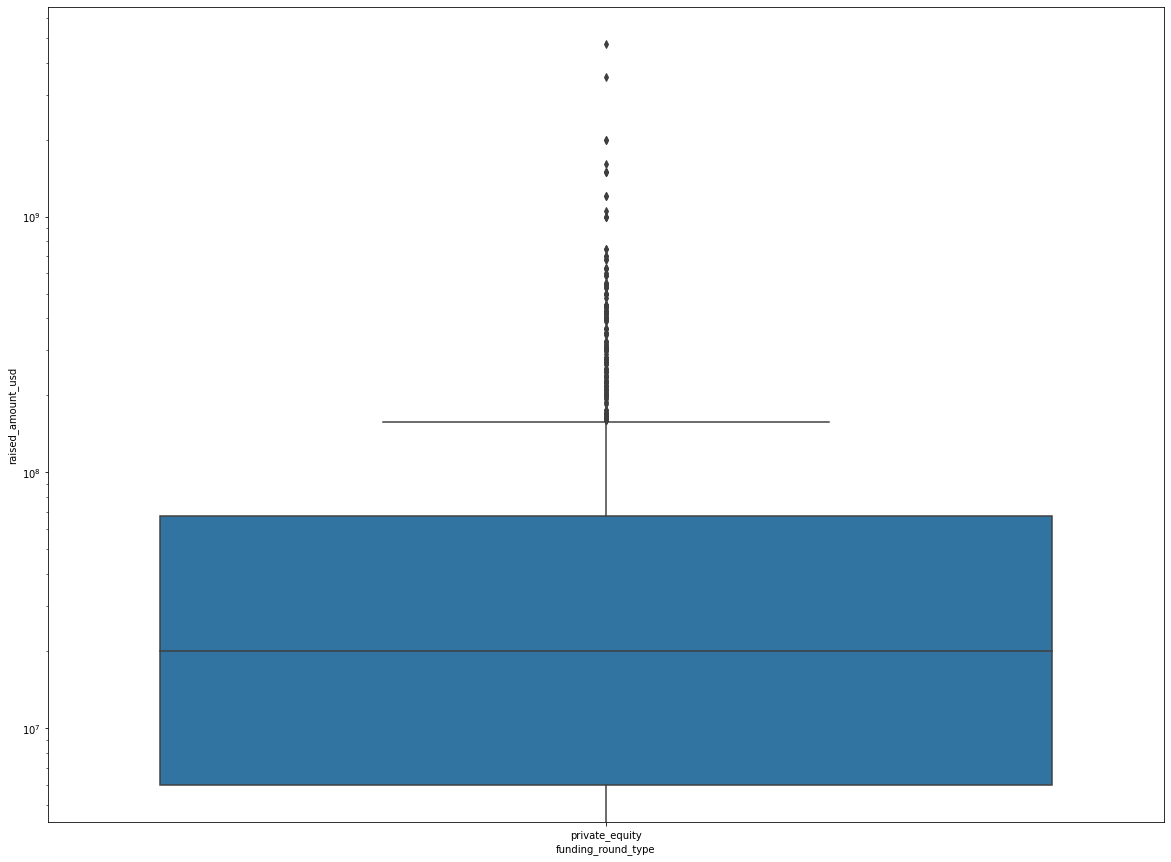

In [81]:
#Plotting the boxplot for funding_round_type 'private_equity'
plt.figure(figsize=(20,15))
sns.boxplot(x=temp[temp.funding_round_type=="private_equity"]["funding_round_type"],y=temp.raised_amount_usd)
plt.yscale("log")
plt.show()

In [82]:
#describing the amount for 'private_equity' type to get the idea of the spread
temp[temp.funding_round_type=="private_equity"]["raised_amount_usd"].describe()

count    2.055000e+03
mean     6.777034e+07
std      1.906579e+08
min      0.000000e+00
25%      6.000000e+06
50%      2.000000e+07
75%      6.727360e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

In [83]:
#total number of rows with funding_type 'private_equity'
temp.loc[(temp.funding_round_type=="private_equity"),"raised_amount_usd"]

21          6000000.0
153       200000000.0
178        20000000.0
231       325000000.0
312          200708.0
             ...     
114399      4319243.0
114453     20000000.0
114871     20000000.0
114875      5000000.0
114921        20967.0
Name: raised_amount_usd, Length: 2055, dtype: float64

In [84]:
#finding an appropriate value of 'amount' above which the data can be dropped
temp.loc[(temp.funding_round_type=="private_equity") & (temp.raised_amount_usd>=300000000),"raised_amount_usd"]

231       3.250000e+08
1205      5.500000e+08
1304      4.220000e+08
3767      1.500000e+09
4366      1.000000e+09
              ...     
106174    1.498515e+09
107347    4.800000e+08
109374    1.050000e+09
113021    7.000000e+08
113845    3.000000e+08
Name: raised_amount_usd, Length: 92, dtype: float64

In [85]:
#finding the percentage of records which can be ignored
92/2055*100

4.476885644768856

In [86]:
#dropping the records where the type is 'private_equity' and amount is greater than 300000000
temp=temp.loc[~((temp.funding_round_type=="private_equity") & (temp.raised_amount_usd>=300000000))]

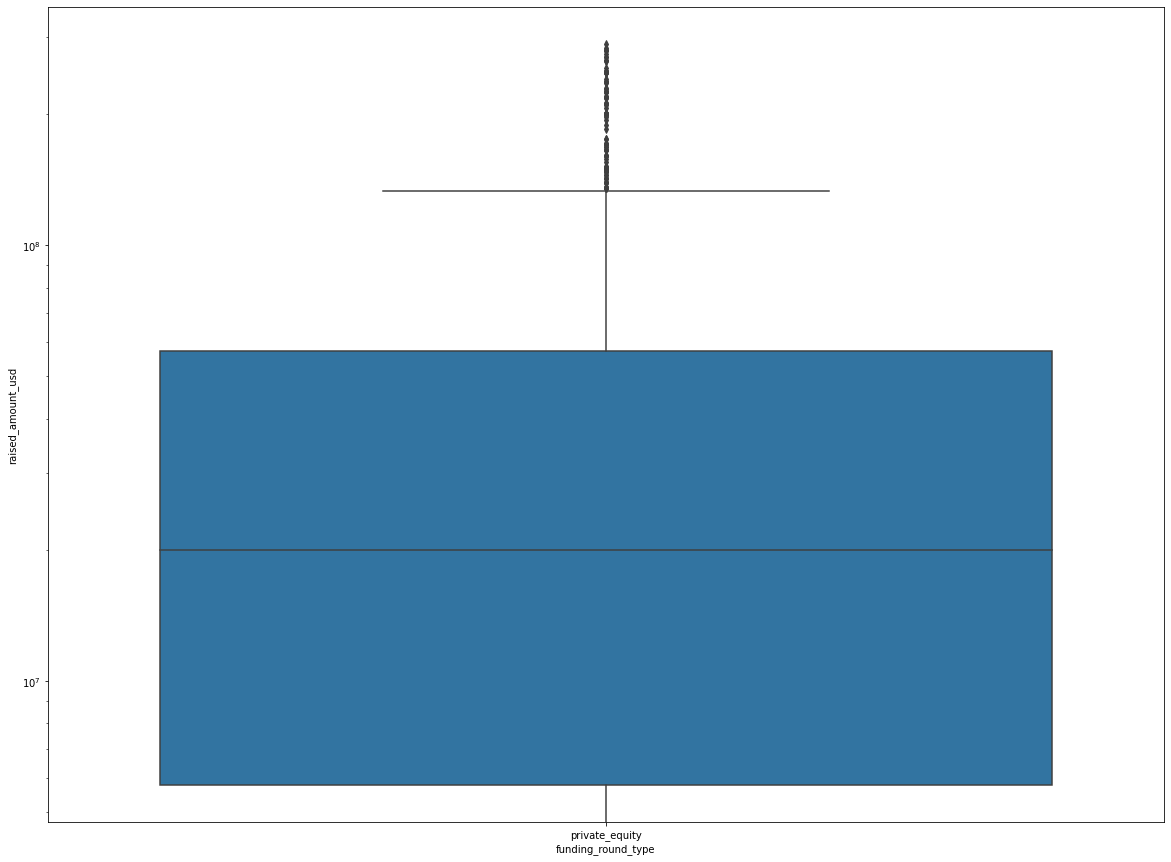

In [87]:
#Plotting the boxplot for funding_round_type 'private_equity' after dropping 4.4% of the rows at higher end
plt.figure(figsize=(20,15))
sns.boxplot(x=temp[temp.funding_round_type=="private_equity"]["funding_round_type"],y=temp.raised_amount_usd)
plt.yscale("log")
plt.show()

In [88]:
#describing the raised_amount for type 'private_equity' after removing the top 4.4% of rows
temp[temp.funding_round_type=="private_equity"]["raised_amount_usd"].describe()

count    1.963000e+03
mean     4.095379e+07
std      5.385345e+07
min      0.000000e+00
25%      5.783165e+06
50%      2.000000e+07
75%      5.725000e+07
max      2.900000e+08
Name: raised_amount_usd, dtype: float64

### <font color='green'>Observations :</font></font> 

* `The mean and median are now much closer`

In [89]:
#finding the shape after the data cleaning process
temp.shape

(83761, 9)

### Conclusion

* We have completed the data cleaning process where we have performed the following steps
    1. Identified missing values in columns
    2. Analysed whether the columns or rows are to be dropped by looking at the end requirement
    3. Dropped columns and rows as per the analysis
    4. Imputed representative values in the cells where the data cannot be dropped and is crucial
    5. Removed outliers in the raised_amoount_usd for each funding_round_type separately 

# <font color='darkblue'>Data Analysis</font>

# <font color='darkblue'>Analysis based on the amount_raised</font>

* `As Sparks Funds is only interest to invest `**`5 million to 15 million USD`**` we need to find the appropriate funding_type where it can potentially invest`

In [90]:

#setting master_frame to temp for data visualization at the end
master_frame = temp

#printing the representative values of raised_amount colum grouped by the funding_type
temp.groupby("funding_round_type")[["raised_amount_usd"]].median().rename(columns={"raised_amount_usd":"Median-Raised Amount"})


Median-Raised Amount
funding_round_type                      
angel                           414906.0
private_equity                20000000.0
seed                            300000.0
venture                        5000000.0

* **`We can see that angel and seed fall between 3 million to 4.15 million.`**
* **`Venture seems to be the right fit as the median is exactly 5million`**
* **`Private_equity might not be the right place to fund as it's median is 20 million`**

`Hence, It's evident that `**`VENTURE`**` funding type best suits what Sparks Funds is looking for`

# <font color='darkblue'>Analysis based on the Country</font>

* Let's now consider only those records where the funding_type is "VENTURE" and start analysing the countries where the investment has been the highest and if they are english speaking

In [91]:
#creating a venture_sub subset which contains only those records where the funding_round_type is "VENTURE"
venture_sub = temp[temp.funding_round_type=="venture"]

In [92]:
#reseting the index for venture_sub and printing the information
venture_sub=venture_sub.reset_index(drop=True)
venture_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51385 entries, 0 to 51384
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                51385 non-null  object 
 1   funding_round_permalink  51385 non-null  object 
 2   funding_round_type       51385 non-null  object 
 3   funded_at                51385 non-null  object 
 4   raised_amount_usd        51385 non-null  float64
 5   name                     51385 non-null  object 
 6   category_list            51385 non-null  object 
 7   status                   51385 non-null  object 
 8   country_code             51385 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.5+ MB


### <font color='green'>Obeservations<font>

* `We can see that there are 49648 records where the funding_round_type is 'venture' and obviously venture_sub has got no missing values.`


**`Let's now narrow down this data based on the countries by considering only the top 9 countries which have received the highest total funding.`**

In [93]:
#creating a groupby object based on the countries and considering the sum of raised_amount for each country
#and sorting those in desceding order
countries = venture_sub.groupby(["country_code"])[["raised_amount_usd"]].sum().sort_values(by="raised_amount_usd",ascending=False)

In [94]:
#printing the top 9 countries where the hightest amount of investments were made
countries.head(9)

raised_amount_usd
country_code                   
USA                3.363277e+11
CHN                2.178995e+10
GBR                1.761455e+10
IND                9.808309e+09
CAN                9.279218e+09
ISR                7.094350e+09
FRA                6.264712e+09
DEU                6.009988e+09
CHE                2.881089e+09

In [95]:
#considering only a subset of data into top9 from venture_sub where the country_code is either of these 9 values
#since we only require top 9 countries with highest investment 

top9=venture_sub[venture_sub.country_code.isin(list(countries.head(9).index))]

In [96]:
#printing the shape of this data
top9=top9.reset_index(drop=True)
top9.shape

(47002, 9)

In [97]:
#printing the information of this data
top9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47002 entries, 0 to 47001
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                47002 non-null  object 
 1   funding_round_permalink  47002 non-null  object 
 2   funding_round_type       47002 non-null  object 
 3   funded_at                47002 non-null  object 
 4   raised_amount_usd        47002 non-null  float64
 5   name                     47002 non-null  object 
 6   category_list            47002 non-null  object 
 7   status                   47002 non-null  object 
 8   country_code             47002 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.2+ MB


In [98]:
#checking if we have rightly created a subset containing only the top 9 countries by doing a value_counts on country_code
top9.country_code.value_counts()

USA    37620
GBR     2245
CHN     1948
CAN     1325
FRA      964
IND      959
ISR      894
DEU      760
CHE      287
Name: country_code, dtype: int64

### <font color='green'>Observations :</font>


* `The top 9 countries based on highest investments made into are : `**`USA, United Kingdom, China, Canada, France, India, Isreal, Germany, Switzerland`**

  `Let's now filter this further by only considering those countries where english is official.`

In [99]:
#creating a dictionary with keys as country codes and boolaen values which denote if english is an official
#languge in that country
eng_spk={"USA":True,"GBR":True,"CHN":False,"CAN":True,"FRA":False,"IND":True,"ISR":False,"DEU":False,"CHE":True}

In [100]:
#creating a column in the top9 dataset named 'eng_spk' which denotes whether the country to which a company belongs
#to has english as on of the official languages
top9["eng_spk"]=top9.country_code.apply(lambda x: eng_spk[x])

In [101]:
#printing the information of the updated data set to see if the new column got created
top9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47002 entries, 0 to 47001
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                47002 non-null  object 
 1   funding_round_permalink  47002 non-null  object 
 2   funding_round_type       47002 non-null  object 
 3   funded_at                47002 non-null  object 
 4   raised_amount_usd        47002 non-null  float64
 5   name                     47002 non-null  object 
 6   category_list            47002 non-null  object 
 7   status                   47002 non-null  object 
 8   country_code             47002 non-null  object 
 9   eng_spk                  47002 non-null  bool   
dtypes: bool(1), float64(1), object(8)
memory usage: 3.3+ MB


In [102]:
#reseting the index and printing the head of the data to see the new column with the right boolean values
top9=top9.reset_index(drop=True)
top9.head(5)

permalink  \
0                  /organization/-fame   
1               /organization/-qounter   
2                /organization/0-6-com   
3       /organization/004-technologies   
4  /organization/0ndine-biomedical-inc   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
3  /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830            venture   
4  /funding-round/954b9499724b946ad8c396a57a5f3b72            venture   

    funded_at  raised_amount_usd                    name  \
0  05-01-2015         10000000.0                   #fame   
1  14-10-2014          5000000.0                :Qounter   
2  19-03-2008          2000000.0                 0-6.com   
3  24-07-2014          5000000.0        004 Technologies   
4  21-12-2009           719491.0  Ondine Biomedical Inc.   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                        Curated Web  operating          CHN   
3                                           Software  operating          USA   
4                                      Biotechnology  operating          CAN   

   eng_spk  
0     True  
1     True  
2    False  
3     True  
4     True

In [103]:
#finding the top 3 english speaking countries from the these 9 countries
top3_eng = top9[top9.eng_spk==True].groupby("country_code")[["raised_amount_usd"]].sum().nlargest(3,columns="raised_amount_usd")
top3_eng

raised_amount_usd
country_code                   
USA                3.363277e+11
GBR                1.761455e+10
IND                9.808309e+09

### <font color='green'>Observations :</font></font> 

* `The top 3 english speaking countries are : `**`USA, United Kingdom(GBR) and India(IND)`**` where the investments are highest among the english speaking.`

# <font color='darkblue'>Analysis based on the Sector</font>

* `Since the current data set top9 has the top 9 companies and their sub-sectors, we need to map thos sub sectors to the main sectors by merging the mappings with top9.`

* `However, we have the mappings data in `**`wide format`**` which we need to convert to `**`long format`**` to just have 2 columns namely category_list and Sector.`

`We can make use of the melt method in pandas to convert it into long format`

In [104]:
#reading the mapping file
mapping = pd.read_csv("Mapping.csv",encoding="ISO-8859-1")

In [105]:
#viewing the head of the data which. Evidently the data is in wide format
mapping.head()

category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
0            NaN                    0       1                           0   
1             3D                    0       0                           0   
2    3D Printing                    0       0                           0   
3  3D Technology                    0       0                           0   
4     Accounting                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
0              0       0              0                           0       0   
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   

   Social, Finance, Analytics, Advertising  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        1

In [106]:
#listing the columns this mapping dataset has
list(mapping.columns)

['category_list',
 'Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [107]:
#viewing if there are any missing values in the mappings dataframe
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

**Since there's one missing value in category_list columns which is the primary column in this dataframe, let's remove the record where category_list is NaN**

In [108]:
#dropping the row with null value in the category_list column
mapping = mapping[~mapping.category_list.isna()]

In [109]:
#verifying furhter if there are any missing values
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [110]:
#creating a new dataframe called melted_mapping which contains the long format of the mapping dataframe
# we give the category_list as the column which should stay intact and the rest of the columns which need to 
# be converted to long format

melted_mapping = pd.melt(mapping,id_vars=["category_list"],value_vars=list(mapping.columns)[1:])
melted_mapping

category_list                                 variable  value
0                   3D                      Automotive & Sports      0
1          3D Printing                      Automotive & Sports      0
2        3D Technology                      Automotive & Sports      0
3           Accounting                      Automotive & Sports      0
4     Active Lifestyle                      Automotive & Sports      0
...                ...                                      ...    ...
6178         Wholesale  Social, Finance, Analytics, Advertising      0
6179  Wine And Spirits  Social, Finance, Analytics, Advertising      0
6180          Wireless  Social, Finance, Analytics, Advertising      0
6181             Women  Social, Finance, Analytics, Advertising      0
6182      Young Adults  Social, Finance, Analytics, Advertising      0

[6183 rows x 3 columns]

**`The melted_mapping contains data in long format but we need to get rid of the rows where the value is 0, which means that the corresponding category_list doesn't belong to the corresponding Sector (variable)`**

In [111]:
#getting rid of rows where the value is 0
melted_mapping = melted_mapping[~(melted_mapping.category_list.isna()) & (melted_mapping.value!=0)]

In [112]:
melted_mapping

category_list                                 variable  value
7      Adventure Travel                      Automotive & Sports      1
13            Aerospace                      Automotive & Sports      1
44                 Auto                      Automotive & Sports      1
45      Automated Kiosk                      Automotive & Sports      1
46           Automotive                      Automotive & Sports      1
...                 ...                                      ...    ...
6112  Social Recruiting  Social, Finance, Analytics, Advertising      1
6113  Social Television  Social, Finance, Analytics, Advertising      1
6114      Social Travel  Social, Finance, Analytics, Advertising      1
6125    Stock Exchanges  Social, Finance, Analytics, Advertising      1
6158    Venture Capital  Social, Finance, Analytics, Advertising      1

[687 rows x 3 columns]

**`We don't require the value column once we have mapped the category_list to the right sector. Hence we can drop it.`**

In [113]:
#dropping the value column
melted_mapping=melted_mapping.drop("value",axis=1)

In [114]:
#changing the column variable to Sector for better readability
melted_mapping = melted_mapping.rename(columns={"variable":"Sector"})

In [115]:
#reseting the index
melted_mapping=melted_mapping.reset_index(drop=True)

melted_mapping

category_list                                   Sector
0     Adventure Travel                      Automotive & Sports
1            Aerospace                      Automotive & Sports
2                 Auto                      Automotive & Sports
3      Automated Kiosk                      Automotive & Sports
4           Automotive                      Automotive & Sports
..                 ...                                      ...
682  Social Recruiting  Social, Finance, Analytics, Advertising
683  Social Television  Social, Finance, Analytics, Advertising
684      Social Travel  Social, Finance, Analytics, Advertising
685    Stock Exchanges  Social, Finance, Analytics, Advertising
686    Venture Capital  Social, Finance, Analytics, Advertising

[687 rows x 2 columns]

In [116]:
#printing the number of sub-sectors in each sector
melted_mapping.Sector.value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: Sector, dtype: int64

* **`Now that we have successfully converted the wide format of mapping into long format we need to create a new column in the top9 dataframe which containst he primary_category since few of the rows have multiple sub categories concatenated together with '|' as the delimiter.`**

**`We will consider only the first string before the first '|' as the primary category`**

In [117]:
#creating a new column named primary_cat which will contain the sub_category of a particular company
top9['primary_cat'] = top9.category_list.apply(lambda x: x.split("|")[0])

In [118]:
#verifying if the new column got created with appropriate values
top9.head(10)

permalink  \
0                  /organization/-fame   
1               /organization/-qounter   
2                /organization/0-6-com   
3       /organization/004-technologies   
4  /organization/0ndine-biomedical-inc   
5                 /organization/0xdata   
6                 /organization/0xdata   
7                 /organization/0xdata   
8           /organization/1-mainstream   
9        /organization/10-minutes-with   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
3  /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830            venture   
4  /funding-round/954b9499724b946ad8c396a57a5f3b72            venture   
5  /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
6  /funding-round/ae2a174c06517c2394aed45006322a7e            venture   
7  /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
8  /funding-round/b952cbaf401f310927430c97b68162ea            venture   
9  /funding-round/0faccbbcc5818dc5326469f13f5a8ac8            venture   

    funded_at  raised_amount_usd                    name  \
0  05-01-2015         10000000.0                   #fame   
1  14-10-2014          5000000.0                :Qounter   
2  19-03-2008          2000000.0                 0-6.com   
3  24-07-2014          5000000.0        004 Technologies   
4  21-12-2009           719491.0  Ondine Biomedical Inc.   
5  09-11-2015         20000000.0                  H2O.ai   
6  03-01-2013          1700000.0                  H2O.ai   
7  19-07-2014          8900000.0                  H2O.ai   
8  17-03-2015          5000000.0            1 Mainstream   
9  09-10-2014          4000000.0         10 Minutes With   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                        Curated Web  operating          CHN   
3                                           Software  operating          USA   
4                                      Biotechnology  operating          CAN   
5                                          Analytics  operating          USA   
6                                          Analytics  operating          USA   
7                                          Analytics  operating          USA   
8                   Apps|Cable|Distribution|Software   acquired          USA   
9                                          Education  operating          GBR   

   eng_spk            primary_cat  
0     True                  Media  
1     True  Application Platforms  
2    False            Curated Web  
3     True               Software  
4     True          Biotechnology  
5     True              Analytics  
6     True              Analytics  
7     True              Analytics  
8     True                   Apps  
9     True              Education

In [119]:
#renaming the column category_list in melted_mapping to ensure that both the column names in top9 and melted_mapping
#are identical before merging these two dataframes
melted_mapping = melted_mapping.rename(columns={"category_list":"primary_cat"})

In [120]:
#merging the top9 and melted_mapping dataframes by using the outer join as we need all the rows of top9 
#with corresponding values of Sector from the melted_mapping
top9 = pd.merge(top9,melted_mapping,how="left",on="primary_cat")

In [121]:
#verifying if the merge has been successful
top9.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47002 entries, 0 to 47001
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                47002 non-null  object 
 1   funding_round_permalink  47002 non-null  object 
 2   funding_round_type       47002 non-null  object 
 3   funded_at                47002 non-null  object 
 4   raised_amount_usd        47002 non-null  float64
 5   name                     47002 non-null  object 
 6   category_list            47002 non-null  object 
 7   status                   47002 non-null  object 
 8   country_code             47002 non-null  object 
 9   eng_spk                  47002 non-null  bool   
 10  primary_cat              47002 non-null  object 
 11  Sector                   43886 non-null  object 
dtypes: bool(1), float64(1), object(10)
memory usage: 4.3+ MB


In [122]:
top9.head()

permalink  \
0                  /organization/-fame   
1               /organization/-qounter   
2                /organization/0-6-com   
3       /organization/004-technologies   
4  /organization/0ndine-biomedical-inc   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
3  /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830            venture   
4  /funding-round/954b9499724b946ad8c396a57a5f3b72            venture   

    funded_at  raised_amount_usd                    name  \
0  05-01-2015         10000000.0                   #fame   
1  14-10-2014          5000000.0                :Qounter   
2  19-03-2008          2000000.0                 0-6.com   
3  24-07-2014          5000000.0        004 Technologies   
4  21-12-2009           719491.0  Ondine Biomedical Inc.   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                        Curated Web  operating          CHN   
3                                           Software  operating          USA   
4                                      Biotechnology  operating          CAN   

   eng_spk            primary_cat                      Sector  
0     True                  Media               Entertainment  
1     True  Application Platforms  News, Search and Messaging  
2    False            Curated Web  News, Search and Messaging  
3     True               Software                      Others  
4     True          Biotechnology  Cleantech / Semiconductors

### <font color='green'>Observations :</font></font> 

* `We have now got 2 new colums introduced into our data frame namely primary_cat : denotes the primary category and Secotr : which denotes the main category`

  `We now need to create 3 new dataframes which will be based on the top 3 english speaking countries from the top9 countries. Since we know that they are USA, United Kingdom and India, we'll create 3 subsets for 3 countries`
  
  
  

In [123]:
#subset 1 for the companies belonging to 'USA' and where the investments are between 5000000 and 15000000
DF1 = top9[(top9.country_code=="USA") & (top9.raised_amount_usd<=15000000) & (top9.raised_amount_usd>=5000000)]

In [124]:
#subset 2 for the companies belonging to 'United Kingdom' and where the investments are between 5000000 and 15000000
DF2 = top9[(top9.country_code=="GBR") & (top9.raised_amount_usd<=15000000) & (top9.raised_amount_usd>=5000000)]

In [125]:
#subset 1 for the companies belonging to "India" and where the investments are between 5000000 and 15000000
DF3 = top9[(top9.country_code=="IND")& (top9.raised_amount_usd<=15000000) & (top9.raised_amount_usd>=5000000)]

#### Total Numner of Investments

In [126]:
#printing total number of investments in each country
print(len(DF1.index))
print(len(DF2.index))
print(len(DF3.index))

14155
845
493


#### Total amount of Investments

In [127]:
#sum of investments made in USA
sum(DF1.raised_amount_usd)

118221584223.0

In [128]:
#sum of investments made in United Kingdom
sum(DF2.raised_amount_usd)

6499078691.0

In [129]:
#sum of investments made in India
sum(DF3.raised_amount_usd)

3774543602.0

#### Top Sector Based on Count of Investments

In [130]:
#top sectors in USA based on the number of investments made
DF1.groupby("Sector")[["raised_amount_usd"]].count().sort_values(by="raised_amount_usd",ascending=False)

raised_amount_usd
Sector                                                    
Others                                                3373
Cleantech / Semiconductors                            2561
Social, Finance, Analytics, Advertising               2309
News, Search and Messaging                            1824
Health                                                1048
Manufacturing                                          989
Entertainment                                          712
Automotive & Sports                                    228

In [131]:
#top sectors in UK based on the number of investments made
DF2.groupby("Sector")[["raised_amount_usd"]].count().sort_values(by="raised_amount_usd",ascending=False)

raised_amount_usd
Sector                                                    
Others                                                 207
Cleantech / Semiconductors                             150
Social, Finance, Analytics, Advertising                139
News, Search and Messaging                              97
Entertainment                                           78
Manufacturing                                           52
Health                                                  32
Automotive & Sports                                     26

In [132]:
#top sectors in India based on the number of investments made
DF3.groupby("Sector")[["raised_amount_usd"]].count().sort_values(by="raised_amount_usd",ascending=False)

raised_amount_usd
Sector                                                    
Others                                                 157
News, Search and Messaging                              76
Social, Finance, Analytics, Advertising                 59
Entertainment                                           46
Health                                                  33
Manufacturing                                           30
Cleantech / Semiconductors                              29
Automotive & Sports                                     14

#### Top Company with highst amount of investment based on Top two Sectors ( based on No. of Investments)

In [133]:
#finding the top company based on the sum of investments made which belongs to the Sector with highest number
#investments in USA

# Creating subset of DF1 based on the top sector "Others" and grouping by companies. On this groupby object
# we can call sum of "raised_amount_usd" and sort values to get the companies and their sum of investments 
# which belong to the "Others" sector in descending order

DF1[DF1.Sector=="Others"].groupby("name")[["raised_amount_usd"]].sum().sort_values(by="raised_amount_usd",ascending=False)


raised_amount_usd
name                                
Virtustream               64300000.0
Tillster                  61198945.0
Capella Photonics         54968051.0
AirTight Networks         54201907.0
deCarta                   52100000.0
...                              ...
Incentive Logic            5000000.0
One Month                  5000000.0
Syncreon                   5000000.0
SynapticMash               5000000.0
Lore                       5000000.0

[2311 rows x 1 columns]

In [134]:
#finding the top company based on the sum of investments made which belongs to the Sector with second highest number
#investments in USA

# Creating subset of DF1 based on the top sector "Cleantech / Semiconductors" and grouping by companies. On this groupby object
# we can call sum of "raised_amount_usd" and sort values to get the companies and their sum of investments 
# which belong to the "Cleantech / Semiconductors" sector in descending order

DF1[DF1.Sector=="Cleantech / Semiconductors"].groupby("name")[["raised_amount_usd"]].sum().sort_values(by="raised_amount_usd",ascending=False)


raised_amount_usd
name                                                        
Quellan                                           82000000.0
Biodesix                                          75300000.0
Tigo Energy                                       68739496.0
ForSight Labs                                     61300001.0
Rheonix                                           56124758.0
...                                                      ...
Spinal Restoration                                 5000000.0
Lumenz                                             5000000.0
Biotherapeutics                                    5000000.0
Specialized Health Products International          5000000.0
BioPro Pharmaceutical                              5000000.0

[1733 rows x 1 columns]

In [135]:
#finding the top company based on the sum of investments made which belongs to the Sector with highest number
#investments in UK

# Creating subset of DF2 based on the top sector "Others" and grouping by companies. On this groupby object
# we can call sum of "raised_amount_usd" and sort values to get the companies and their sum of investments 
# which belong to the "Others" sector in descending order


DF2[DF2.Sector=="Others"].groupby("name")[["raised_amount_usd"]].sum().sort_values(by="raised_amount_usd",ascending=False)


raised_amount_usd
name                                 
Electric Cloud             37000000.0
Notonthehighstreet         36900000.0
SenSage                    36250000.0
Enigmatec                  32500000.0
ip.access                  30000000.0
...                               ...
Clinithink                  5000000.0
Tideway                     5000000.0
Clearswift                  5000000.0
Hexology                    5000000.0
ACHICA                      5000000.0

[164 rows x 1 columns]

In [136]:
#finding the top company based on the sum of investments made which belongs to the Sector with second highest number
#investments in UK

# Creating subset of DF2 based on the top sector "Cleantech / Semiconductors" and grouping by companies. On this groupby object
# we can call sum of "raised_amount_usd" and sort values to get the companies and their sum of investments 
# which belong to the "Cleantech / Semiconductors" sector in descending order

DF2[DF2.Sector=="Cleantech / Semiconductors"].groupby("name")[["raised_amount_usd"]].sum().sort_values(by="raised_amount_usd",ascending=False)


raised_amount_usd
name                                           
EUSA Pharma                          35600000.0
Horizon Discovery                    31353719.0
F-star Biotechnology Limited         29132906.0
Elixent                              25000000.0
Takeda Cambridge                     22340000.0
...                                         ...
Synthace                              5000000.0
Atopix Therapeutics                   5000000.0
Exco InTouch                          5000000.0
Purely Proteins Limited               5000000.0
DNAe LTD                              5000000.0

[122 rows x 1 columns]

In [137]:
#finding the top company based on the sum of investments made which belongs to the Sector with highest number
#investments in India

# Creating subset of DF3 based on the top sector "Others" and grouping by companies. On this groupby object
# we can call sum of "raised_amount_usd" and sort values to get the companies and their sum of investments 
# which belong to the "Others" sector in descending order

DF3[DF3.Sector=="Others"].groupby("name")[["raised_amount_usd"]].sum().sort_values(by="raised_amount_usd",ascending=False)


raised_amount_usd
name                                                                 
FirstCry.com                                               39000000.0
Myntra                                                     38000000.0
CommonFloor                                                32900000.0
Pepperfry.com                                              28000000.0
Maharana Infrastructure and Professional Servic...         26600000.0
...                                                               ...
Freshworld                                                  5000000.0
Stayzilla                                                   5000000.0
TastyKhana                                                  5000000.0
FindYahan                                                   5000000.0
Mosambee                                                    5000000.0

[128 rows x 1 columns]

In [138]:
#finding the top company based on the sum of investments made which belongs to the Sector with second highest number
#investments in India

# Creating subset of DF3 based on the top sector "News, Search and Messaging" and grouping by companies. On this groupby object
# we can call sum of "raised_amount_usd" and sort values to get the companies and their sum of investments 
# which belong to the "News, Search and Messaging" sector in descending order

DF3[DF3.Sector=="News, Search and Messaging"].groupby("name")[["raised_amount_usd"]].sum().sort_values(by="raised_amount_usd",ascending=False)


raised_amount_usd
name                                   
GupShup                      33000000.0
Roadrunnr                    26000000.0
IMImobile                    23000000.0
SMS GupShup                  22000000.0
hike                         21000000.0
...                                 ...
MyBusTickets                  5000000.0
NowFloats                     5000000.0
Ping Digital Network          5000000.0
Plustxt                       5000000.0
Nifty Window                  5000000.0

[63 rows x 1 columns]

### <font color='green'>Observations :</font>

**`Sector-wise Investment Analysis`**

| Sl.no | Questions | USA  |GBR | India |
| ---------- | :----------- | ------------  | ---------- | ---------- |
|1|**Total number of Investments (count)**|14155|845|493|
|2|**Total amount of investment (USD)**|118221584223|6499078691|3774543602|
|3|**Top Sector name (no. of investment-wise)**|Others|Others|Others|
|4|**Second Sector name (no. of investment-wise)**|Cleantech / Semiconductors|Cleantech / Semiconductors|News, Search and Messaging|
|5|**Third Sector name (no. of investment-wise)**|Social, Finance, Analytics, Advertising|Social, Finance, Analytics, Advertising|Social, Finance, Analytics, Advertising|
|6|**Number of investments in top sector (3)**|3373|207|157|
|7|**Number of investments in second sector (4)**|2561|150|76|
|8|**Number of investments in third sector (5)**|2309|139|59|
|9|**For point 3 (top sector count-wise), which company received the highest investment?**|Virtustream|Electric Cloud|FirstCry.com|
|10|**For point 4 (second best sector count-wise), which company received the highest investment?**|Quellan|EUSA Pharma|GupShup|

# <font color='darkblue'>Data Visualization</font>

**`We will now use the master_frame which has the top 9 countries with 4 Funing types and their amount_raised_usd`**

## <font color='darkviolet'>Plot showing the representatative amounts of investment across 4 Funding Types</font>

In [139]:
#importing plotly express for visualization
import plotly.express as px

#creating a box plot across 4 funding types which Sparks Funds is interested in
fig1 = px.box(master_frame, x="funding_round_type", y="raised_amount_usd",
              color="funding_round_type",
              labels={'funding_round_type':'Funding Type','raised_amount_usd':'Amount Raised'},
              log_y=True,height=800)

#setting the Title and its position
fig1.update_layout(
                 title={
        'text': "Representative Investment amount across Funding Types",
        'y':0.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

#displaying the plot
fig1.show()

### <font color='green'>Observations :</font></font>

* `We can clearly see that the median value of Venture is 5 million which makes is a perfet type where Sparks Funds can invest. The other types are either less or more than the 5-15 million constraint`

## <font color='darkviolet'>Plot showing the top 9 countries against the total amount of investments of funding type "Venture"</font>

Let's group the master_frame by countries and count the number of investments corresponding to each country

In [140]:
#creating a group by object by grouping the top9 dataset based on countries and summing the raised amount
#for each country we get the total amount invested in each country. Sorting this in descending order will 
#give us countries in the order of most invested to least invested among the top 9
country_group = top9.groupby("country_code",as_index=False)[["raised_amount_usd","eng_spk"]].sum().sort_values(ascending=False,by="raised_amount_usd")

# renaming the raised_amount_usd as total_investment as logcally we are summing up the investment made in 
#individual companies
country_group = country_group.rename(columns={"raised_amount_usd":"total_investment"})

#converting the eng_spk column here to 'True or False' as it currently contains the count of True False values
country_group.eng_spk = country_group.eng_spk.apply(lambda x:True if x>0 else False)

country_group

country_code  total_investment  eng_spk
8          USA      3.363277e+11     True
2          CHN      2.178995e+10    False
5          GBR      1.761455e+10     True
6          IND      9.808309e+09     True
0          CAN      9.279218e+09     True
7          ISR      7.094350e+09    False
4          FRA      6.264712e+09    False
3          DEU      6.009988e+09    False
1          CHE      2.881089e+09     True

In [141]:
#creating a box plot across top 9 countries against the total amount of investment they got
fig2 = px.bar(country_group,x='country_code', y='total_investment',
             hover_data=['country_code','total_investment','eng_spk'], 
             color='eng_spk',
             labels={'country_code':'Country','total_investment':'Sum of Investments','eng_spk':'English Speaking'},
             height=800,log_y=True)

#setting the Title and its position
fig2.update_layout(xaxis_categoryorder = 'total descending',
                 title={
        'text': "Sum of Investments in top 9 Countries",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

#displaying the plot
fig2.show()

### <font color='green'>Observations :</font></font>

* `The top 3 countries in terms of the highest investment are `**`USA, China and UK`**
* `However, `**`China is a non english-speaking ( where english is unofficial language ) country`**` and hence the top 3 english speaking high invested companies happen to be `**`USA, UK and India`**

## <font color='darkviolet'>Plot showing the number of investments in the Top 3 sectors of the Top 3 Countries</font>

**`For this we need to first find out the subset of top 3 english speaking companies from the top 9`**

In [142]:
#creating a subset of the top3 english speaking companies from top9
top3=top9[top9["country_code"].isin(["USA","GBR","IND"]) & (top9.raised_amount_usd<=15000000) & (top9.raised_amount_usd>=5000000)]

In [143]:
#verifying if we got only the records with the above filtered countries
top3.country_code.value_counts()

USA    14155
GBR      845
IND      493
Name: country_code, dtype: int64

**`We now need to group the data by country,sector and count the investments made in each country filtered by each sector. We also need to get only the top 3 sectors from each country`**

In [144]:
#grouping the top3 data by country,sector and counting the number of investemets.
#Sorting these values based on the number of investments made
p = top3.groupby(["country_code","Sector"],as_index=False)[["raised_amount_usd"]].count().sort_values(ascending=False,by=["country_code","raised_amount_usd"])
p=p.reset_index(drop=True)
p

country_code                                   Sector  raised_amount_usd
0           USA                                   Others               3373
1           USA               Cleantech / Semiconductors               2561
2           USA  Social, Finance, Analytics, Advertising               2309
3           USA               News, Search and Messaging               1824
4           USA                                   Health               1048
5           USA                            Manufacturing                989
6           USA                            Entertainment                712
7           USA                      Automotive & Sports                228
8           IND                                   Others                157
9           IND               News, Search and Messaging                 76
10          IND  Social, Finance, Analytics, Advertising                 59
11          IND                            Entertainment                 46
12          IND                                   Health                 33
13          IND                            Manufacturing                 30
14          IND               Cleantech / Semiconductors                 29
15          IND                      Automotive & Sports                 14
16          GBR                                   Others                207
17          GBR               Cleantech / Semiconductors                150
18          GBR  Social, Finance, Analytics, Advertising                139
19          GBR               News, Search and Messaging                 97
20          GBR                            Entertainment                 78
21          GBR                            Manufacturing                 52
22          GBR                                   Health                 32
23          GBR                      Automotive & Sports                 26

In [145]:
#since we need only the top 3 sectors of each of these countries we can group by Country again and get head(3)
p = p.groupby("country_code",as_index=False).head(3)

#renaming the column to 'Number of Investments' as logically we have counted the total investments
p=p.rename(columns={"raised_amount_usd":"Number of Investments"})

p

country_code                                   Sector  \
0           USA                                   Others   
1           USA               Cleantech / Semiconductors   
2           USA  Social, Finance, Analytics, Advertising   
8           IND                                   Others   
9           IND               News, Search and Messaging   
10          IND  Social, Finance, Analytics, Advertising   
16          GBR                                   Others   
17          GBR               Cleantech / Semiconductors   
18          GBR  Social, Finance, Analytics, Advertising   

    Number of Investments  
0                    3373  
1                    2561  
2                    2309  
8                     157  
9                      76  
10                     59  
16                    207  
17                    150  
18                    139

**`We now have sufficient data to create a plot to show the top3 countries with top3 sectors of investment.`**

*`To introduce a 3rd variable to group the X-axis based on sectors we can use a stacked barplot with 'color' argument`*

In [146]:
#Creating a stacked barplot to group total investments within each country based on sector
fig3 = px.bar(p, x="country_code", y="Number of Investments", color="Sector",
            hover_data=["Number of Investments"],
              labels={'country_code':'Country'},
              barmode = 'stack',height=800,log_y=True)

#setting the Title and its position
fig3.update_layout(xaxis_categoryorder = 'total descending',
                 title={
        'text': "Top 3 Sectors in Top 3 Countries based on Total Number of Investmetns",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

#displaying the plot
fig3.show()

### <font color='green'>Observations :</font></font>

* `The number of investments in USA is pretty high when compared to the other 2 countries UK and India`
* `Both in USA and UK the 'Others' sector has got highest number of investments followed by 'Cleantech/Semiconductors'`
* `In India, there's a slight difference where the investments in 'Others' are still on the top, whereas 'News, Search and Messaging' takes the 2nd position followed by 'Social,Finance,Analytics,Advertising'.`
* `But overall, most number of investments are made in the 'Others', in the top 3 countries.`

# <font color='darkblue'>Conclusion</font>

1. Sparks Funds can invest in the following sectors, Countries and with the following Funding Type:

    **a. Countries : USA, UK and India**
    
    **b. Sectors : 'Others','Cleantech/Semiconductors','News, Search and Messaging' and 'Social,Finance,Analytics,Advertising'**
    
    **c. Funding Type : Venture**
    
    
2. These resutls meet the constraints and criteria given by the Sparks Funds which are :

    **a. Invest in any or all the four Funding Types : Seed, Angel, Venture and private equity**
    
    **b. Provided the investment funding is between 5 million - 15 million USD**
    
    **c. Where most of the other investors are investing**